### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

- **Independent variable**: The words congruent or incongruent condition.

- **Dependent variable**: Time to complete test (seconds spent in viewing each test).

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The null hypothesis should be that the mean time for colour recognition for congruent words is equal to or greater than the mean time for incongruent words.
- Congruency does not influence the time to complete the test.

$ H_0 $ ( Null Hypothesis)                    :  (Population Mean)incongruent   =   (Population Mean)congruent     OR         $ \mu_i = \mu_c $

The alternative hypothesis should be that the congruent words mean is less than the incongruent words mean.
- Congruency influences the time to complete the test, such that: congruent tasks take shorter time to complete than the incongruent tasks.

$ H_1 $ ( Alternative Hypothesis )     :  (Population Mean)incongruent   ≠  (Population Mean)congruent       OR         $ \mu_i$ ≠ $\mu_c $

where:
- μ is a population mean, the subscript "c" represents the congruent words condition, and the subscript "i" represents the incongruent words condition. 
- $ \mu_i$ = Mean time taken to name the ink color for incongruent words.
- $\mu_c $ = Mean time taken to name the ink color for congruent words.
- If we get a significant result, we can reject the null hypothesis and accept the   alternative hypothesis that there are statistically significant differences between the mean time taken to name ink color between two test conditions. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
import pandas as pd
import numpy as np
import math
from scipy.stats import t as t_value
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import the dataset and show the first 5 rows
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
#measure a central tendency of each independent variable
print("Mean Value for Congruent {}".format(np.mean(df['Congruent'].values)))
print("Mean Value for Incongruent {}".format(np.mean(df['Incongruent'].values)))

Mean Value for Congruent 14.051124999999999
Mean Value for Incongruent 22.015916666666666


In [3]:
# measure of variability
print("Standard Deviation for Congruent {}".format(np.std(df['Congruent'].values)))
print("Standard Deviation for Incongruent {}".format(np.std(df['Incongruent'].values)))

Standard Deviation for Congruent 3.484415712766633
Standard Deviation for Incongruent 4.696055134513317


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

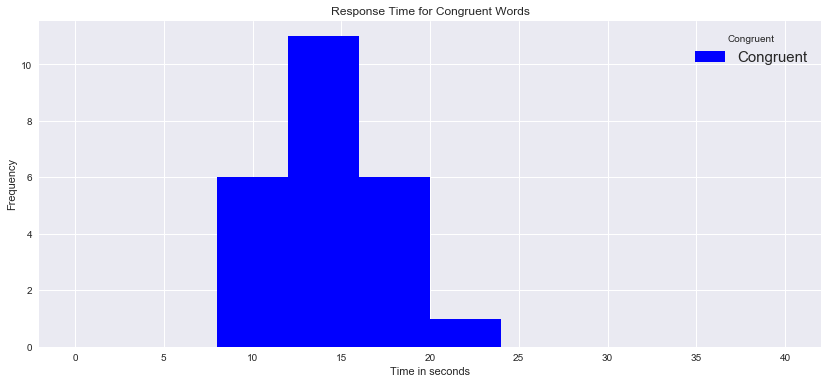

In [4]:
# Build the visualizations here:
plt.style.use('seaborn')
plt.figure(figsize=(14,6))
df['Congruent'].hist(align=('mid'),range = (0, 40), color ='blue',label = ['Congruent'])
plt.xlabel('Time in seconds')
plt.ylabel('Frequency')
plt.title('Response Time for Congruent Words')
plt.legend(prop={'size': 15},title="Congruent")
plt.show()

This histogram shows that largest number of frequency is 6 took between 14 & 16 seconds to complete the congruent test. This group is in the middle of the distribution indicating a fairly normally distributed sample.

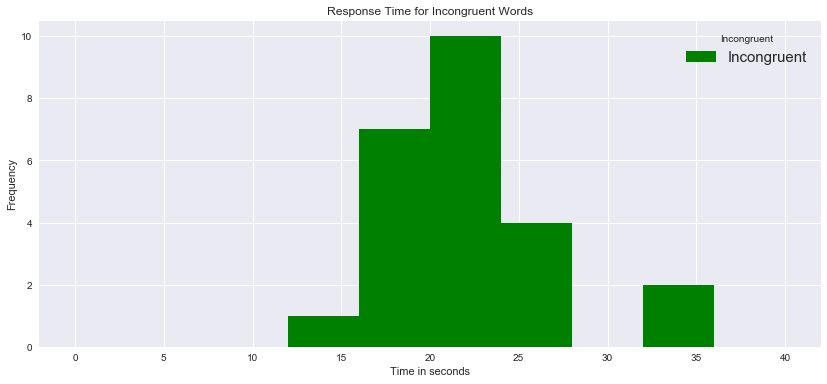

In [5]:
plt.style.use('seaborn')
plt.figure(figsize=(14,6))
df['Incongruent'].hist(align=('mid'),range = (0, 40), color ='green',label = ['Incongruent'])
plt.xlabel('Time in seconds')
plt.ylabel('Frequency')
plt.title('Response Time for Incongruent Words')
plt.legend(prop={'size': 15},title="Incongruent")
plt.show()

This histogram shows that the largest number of frequency is 6 took between 20 & 23 seconds to complete the incongruent test. 
Two participants took exceptionally long time to complete the test with more than 33 seconds.They might be outliers.

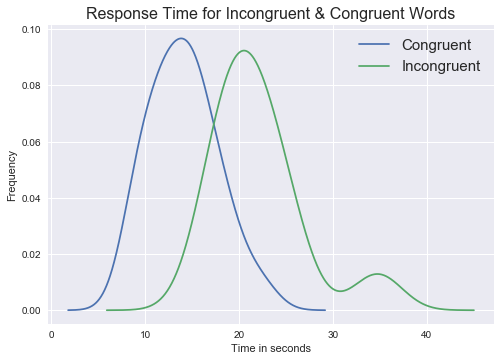

In [6]:
plt.style.use('seaborn')
df.plot.kde(title = 'Time Distribution')
plt.xlabel('Time in seconds')
plt.ylabel('Frequency')
plt.title('Response Time for Incongruent & Congruent Words', fontsize=16)
plt.legend(prop={'size': 15})
plt.show();

This plot shows the 2 time peak for 2 tests

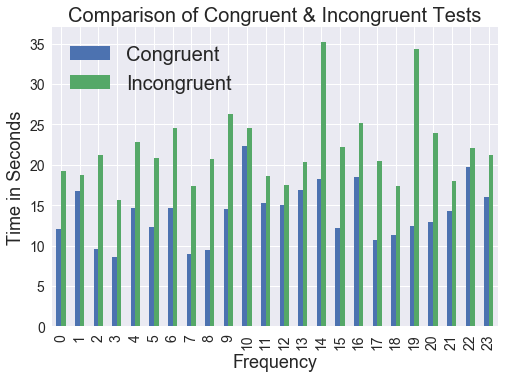

In [7]:
df = pd.DataFrame(df,columns=['Congruent', 'Incongruent'])
df.plot.bar()
plt.title('Comparison of Congruent & Incongruent Tests', fontsize=20);
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Time in Seconds', fontsize=18)
plt.xticks(fontsize=14, visible=True)
plt.yticks(fontsize=14)
plt.legend(prop={'size':20});

As shown in the graphic, particpants took longer to name the ink colors of the **Incongruent** test than the **Congruent** test. There is no single participant that took more time to complete the **Congruent** test than the **Incongruent** test.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [8]:
# Sample Size (n)
Sample_Size= len(df)
print("Sample Size (n) = ",Sample_Size)

Sample Size (n) =  24


In [9]:
# Degree of freedom(df) = n - 1
Degree_of_Freedom = Sample_Size-1
print("Degree of Freedom (df) = ",Degree_of_Freedom)

Degree of Freedom (df) =  23


In [10]:
df['Difference'] =  df['Congruent']- df['Incongruent']
print("Mean of difference data (x̄) = {}".format(np.mean(df['Difference'].values)))

Mean of difference data (x̄) = -7.964791666666666


In [11]:
df['Difference'] =  df['Congruent']- df['Incongruent']
print("Standerd Deviation(SD) = {}".format(np.std(df['Difference'].values)))

Standerd Deviation(SD) = 4.762398030222158


**As the sample size is less than 30 then we will use t-test**

In [12]:
# Perform the statistical test here
# https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg - reference for t-table
# https://learn.co/lessons/dsc-2-19-17-confidence-intervals-with-t-distribution-lab - reference for t-critical coding.
# find t-critical value for 95% confidance interval and 23 degree of freedom for two tailed test

print("t-critical value for two tailed test is :∓ ",round(t_value.ppf(.95, 23),4))

t-critical value for two tailed test is :∓  1.7139


**Answer:**

- The Test is two tailed t- test so find the critical value of t at 95% confidance level  (I want to  have only 5 percent chance of being wrong, with signficance level $a_a $=0.05).
- Sample Size(n)              = 24
- Degree of freedom(df)       = 23
- Mean of difference data (x̄) = -7.9648
- Standerd Deviation(SD)      = 4.7624
- t - critical (tcritical)   = ∓1.7139
- E (Margin of error) = t($a_a $/2).SD/SQRT(n)  = 1.666
- Confidance Interval(CI) at 95% level = (x̄-E, x̄+E)=(-7.9648-1.666,-7.9648+1.666)=(-9.6308,-6.2988)

#### Calculate the t-Value
t_statistic = (x̄)/(SD/math.SQRT(n))

In [13]:
t_statistic = -7.9648/(4.7624/math.sqrt(24))
print("t_statistic is: ",t_statistic)

t_statistic is:  -8.193220184494983


<img src="Pـvalue.jpg">

In [14]:
# calculate the p-value
# Reference: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/
p = (1 - t_value.cdf(abs(t_statistic), 23)) * 2
print("p-value is: ",p)

p-value is:  2.841148516452563e-08


**To determine the acceptance region we will use this range (-t($a_a $/2),t($a_a $/2)) =(-1.7139,1.7139)**

<img src="TTT.jpg">

- The calculated t-statistic is -8.1932 for the difference in colour recognition time means of the congruent and incongruent words data. And -8.1932 is much lower than the t-critical value not fallen in the range -1.7139,1.7139). Since the t-statistic is in the critical region, so the null hypothesis is rejected.
- Null hypothesis rejected At α = 0.05, the time to name colours is significantly different between congruent and incongruent tasks. People do not name colours at the same speed when the word’s meaning and its colour match, as when they do not match. The result confirms my expectations.
- As p-value (2.84e-08) is less than the signficance level $a_a $=0.05, so the null hypothesis is rejected.
- According to the confidence intervals, we can say that the true difference between the congruent and incongruent group mean time is between -9.6308 and -6.2988.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

<p style='text-align: justify;'> 
- My hypothesis for the effects observed is that the brain dominantly focuses on reading the word rather than recognizing a colour when the eyes are presented with a coloured word. To recognize a colour, one has to override the brain's natural tendency of reading the word. This override takes time and is likely not always successful, which means re-analyzing a word after the error is recognized, which costs more time.</span>
<p style='text-align: justify;'> 
- Numerical&Physical size Stroop tasks, where numerical values and physical size are the factors that contribute to congruency/incongruency, results in a similar effect. It takes longer to recognize the number and physical size (two separate tasks) of small numbers that have a large physical size and large numbers that have a small physical size.(reference :https://en.wikipedia.org/wiki/Numerical_Stroop_effect)</span>